In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_curve, auc, precision_score, recall_score, f1_score, accuracy_score

# TensorFlow/Keras (for Phase 4, 5, 6)
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# prettier plots
pd.set_option('display.max_columns', None)

print('TensorFlow version:', tf.__version__)

2025-12-14 19:36:43.029789: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


TensorFlow version: 2.16.2


# Phase1

## 1) Project folders
Create/confirm clean folders for plots and exports so outputs don’t clutter the root.

In [2]:
BASE_DIR = os.getcwd()
DATA_DIR = os.path.join(BASE_DIR, "data")
PLOTS_DIR = os.path.join(BASE_DIR, "plots")
EXPORTS_DIR = os.path.join(BASE_DIR, "exports")

os.makedirs(PLOTS_DIR, exist_ok=True)
os.makedirs(EXPORTS_DIR, exist_ok=True)

print("BASE_DIR:", BASE_DIR)

BASE_DIR: /Users/victoriast.john/untitled folder123/Ai proj


## 2) Load dataset
The Kaggle file is semicolon-separated, so we pass `sep=";"`.

In [3]:
# Load data
# UPDATE THIS PATH to where your CSV file is located
csv_path = "data/cardio_train 2.csv"
df = pd.read_csv(csv_path, sep=";")
print('Original shape:', df.shape)
print(df.head())

Original shape: (70000, 13)
   id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0  18393       2     168    62.0    110     80            1     1      0   
1   1  20228       1     156    85.0    140     90            3     1      0   
2   2  18857       1     165    64.0    130     70            3     1      0   
3   3  17623       2     169    82.0    150    100            1     1      0   
4   4  17474       1     156    56.0    100     60            1     1      0   

   alco  active  cardio  
0     0       1       0  
1     0       1       1  
2     0       0       1  
3     0       1       1  
4     0       0       0  


## 3) Basic info & missing values
Quick scan of types, summary stats, and NaNs.

In [4]:
display(df.info())
display(df.describe(include='all'))
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


None

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

## 4) Exploratory plots — histograms (numeric features)

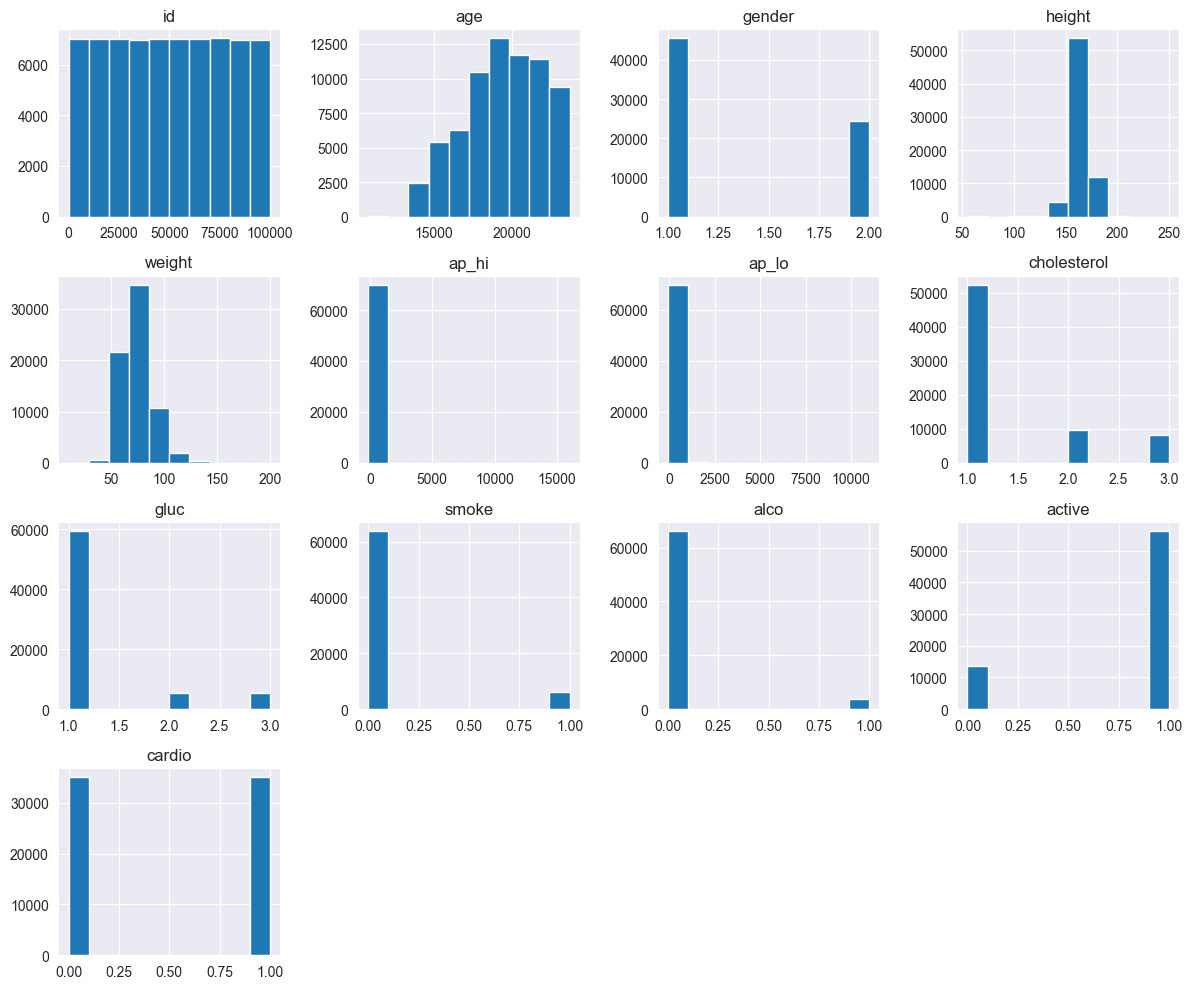

In [5]:
ax = df.hist(figsize=(12, 10))
plt.tight_layout()
plt.savefig(os.path.join(PLOTS_DIR, "all_histogramsF.png"))
plt.show()

## 5) Boxplots (key numeric columns)

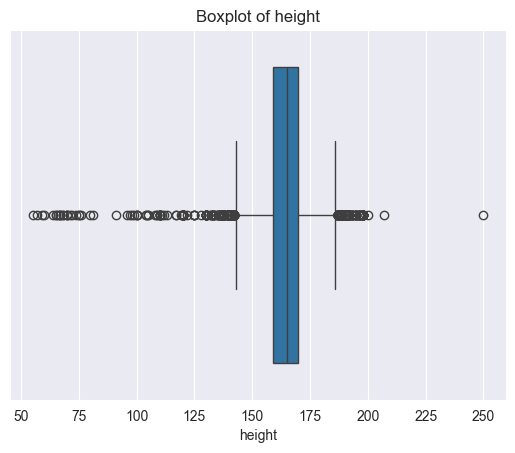

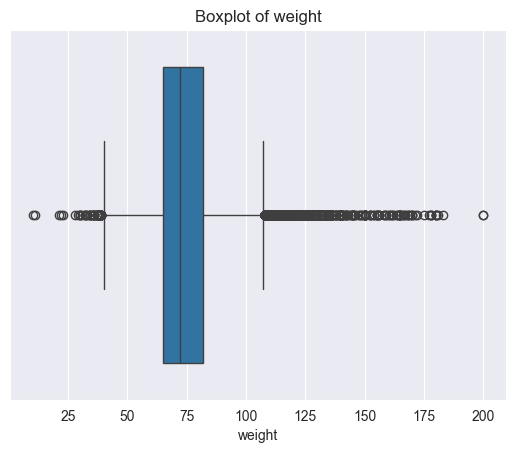

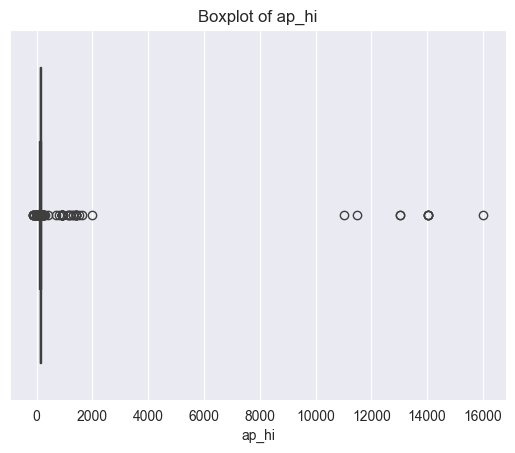

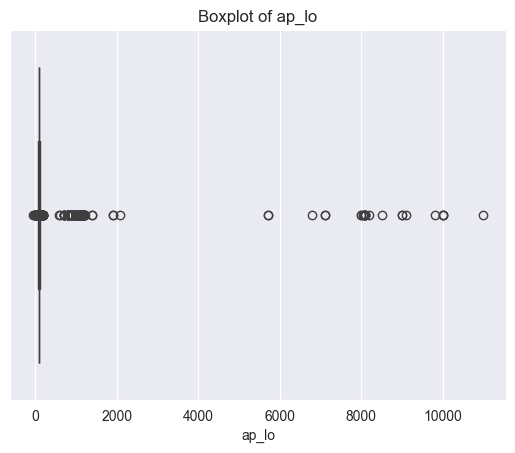

In [6]:
## 5) Boxplots (key numeric columns)

for col in ['height', 'weight', 'ap_hi', 'ap_lo']:
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.savefig(os.path.join(PLOTS_DIR, f'boxplot_{col}.png'))
    plt.show()

## 6) Categorical feature counts

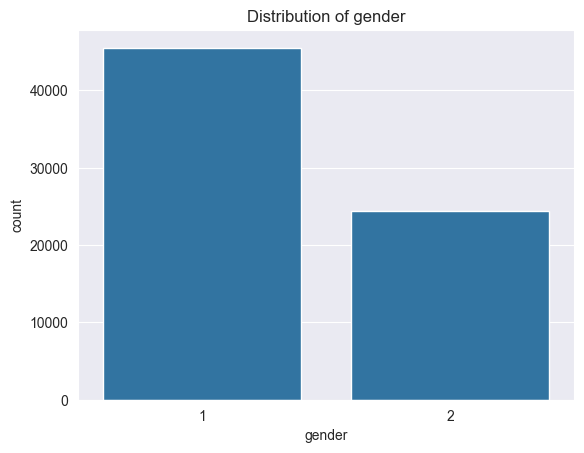

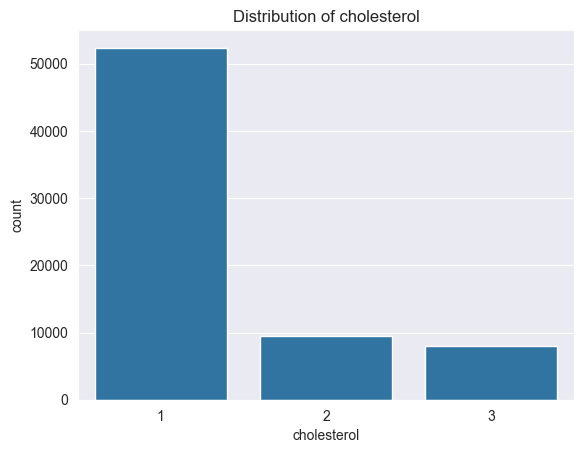

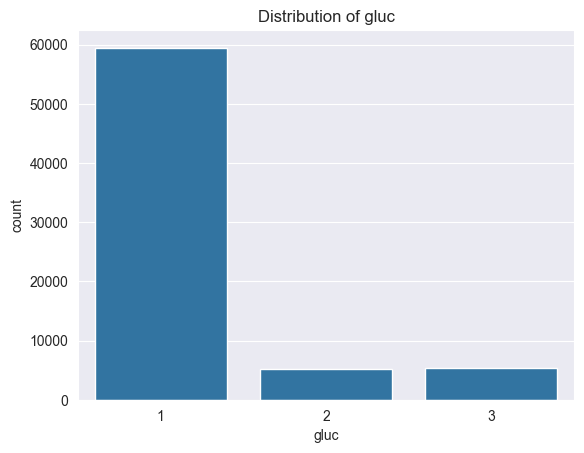

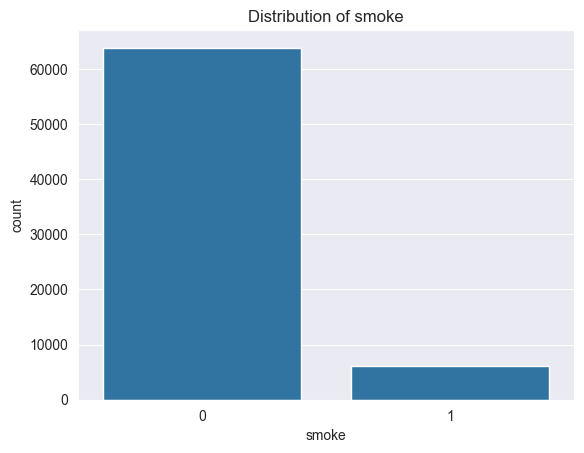

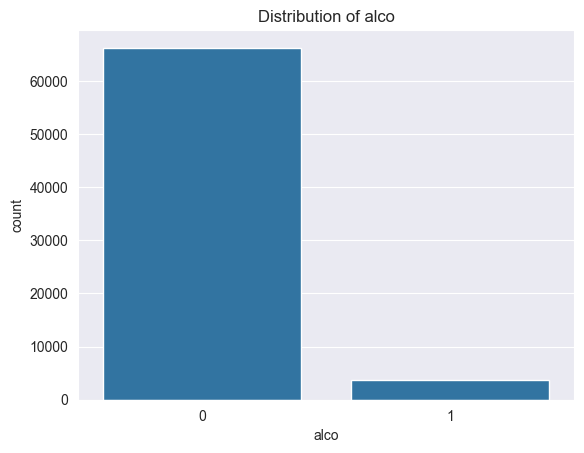

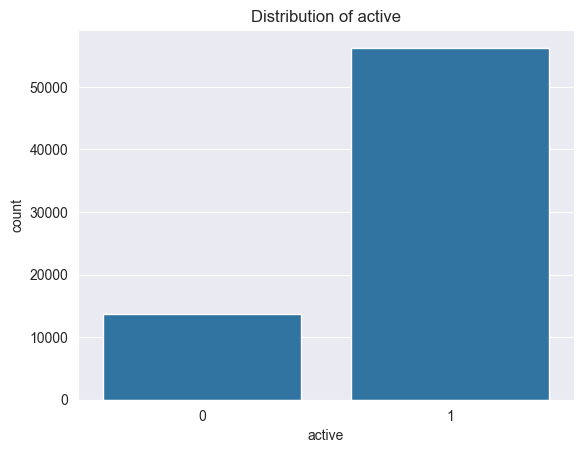

In [7]:
categorical = ['gender','cholesterol','gluc','smoke','alco','active']
for col in categorical:
    sns.countplot(x=df[col])
    plt.title(f'Distribution of {col}')
    plt.savefig(os.path.join(PLOTS_DIR, f'countplot_{col}.png'))
    plt.show()

## 7) Target distribution (class balance)

,percent
cardio,
0,50.03
1,49.97


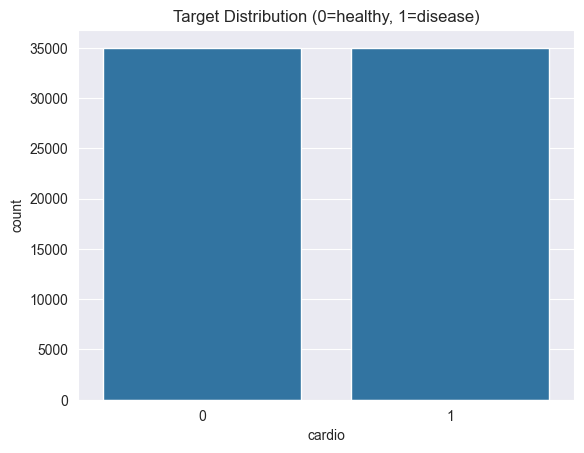

In [8]:
target_counts = df['cardio'].value_counts(normalize=True) * 100
display(target_counts.to_frame('percent'))
sns.countplot(x=df['cardio'])
plt.title('Target Distribution (0=healthy, 1=disease)')
plt.savefig(os.path.join(PLOTS_DIR, "target_distribution.png"))
plt.show()

## 8) Cleaning
Remove weird blood pressure values

In [9]:
# remove the weird values
df = df[(df['ap_hi'] > 0) & (df['ap_hi'] < 300)]
df = df[(df['ap_lo'] > 0) & (df['ap_lo'] < 200)]
df = df[df['ap_hi'] > df['ap_lo']]  # systolic should be > diastolic

print('After cleaning:', df.shape)

After cleaning: (68709, 13)


## 9) Save cleaned copy for future phases

In [10]:
clean_path = os.path.join(EXPORTS_DIR, "cardio_cleaned.csv")
df.to_csv(clean_path, index=False)
print("Saved:", clean_path)

Saved: /Users/victoriast.john/untitled folder123/Ai proj/exports/cardio_cleaned.csv


# Phase 4
Model selection

## 10) Setting up X and Y


In [11]:
# these are my 11 features
feature_cols = ['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
                'cholesterol', 'gluc', 'smoke', 'alco', 'active']

X = df[feature_cols].values
Y = df['cardio'].values

print('X shape:', X.shape)
print('Y shape:', Y.shape)
print('Positive class ratio:', np.mean(Y))

X shape: (68709, 11)
Y shape: (68709,)
Positive class ratio: 0.49470957225399875


## 11) Shuffling everything


In [12]:
# combine X and Y so I can shuffle them together
dataset = np.column_stack((X, Y))
print('Dataset shape before shuffle:', dataset.shape)

# shuffle it up
np.random.seed(42)  # so results are the same each time
np.random.shuffle(dataset)

print('Shuffled!')

Dataset shape before shuffle: (68709, 12)
Shuffled!


## 12) Splitting into training and validation
80/20 split like usual

In [13]:
# figure out where to split
index_20percent = int(0.2 * len(dataset[:, 0]))
print('Validation samples:', index_20percent)
print('Training samples:', len(dataset) - index_20percent)

Validation samples: 13741
Training samples: 54968


In [14]:
# first 20% goes to validation, rest is training
XVALIDATION = dataset[:index_20percent, :-1]
YVALIDATION = dataset[:index_20percent, -1]

XTRAIN = dataset[index_20percent:, :-1]
YTRAIN = dataset[index_20percent:, -1]

print('XTRAIN shape:', XTRAIN.shape)
print('YTRAIN shape:', YTRAIN.shape)
print('XVALIDATION shape:', XVALIDATION.shape)
print('YVALIDATION shape:', YVALIDATION.shape)

XTRAIN shape: (54968, 11)
YTRAIN shape: (54968,)
XVALIDATION shape: (13741, 11)
YVALIDATION shape: (13741,)


## 13) Normalizing the features
Using training data stats only (important!)

In [15]:
# get mean and std from training data only
mean = XTRAIN.mean(axis=0)
std = XTRAIN.std(axis=0)

# normalize training
XTRAIN = (XTRAIN - mean) / std

# use same values for validation
XVALIDATION = (XVALIDATION - mean) / std

print('Mean:', mean)
print('Std:', std)

Mean: [1.94623367e+04 1.34816621e+00 1.64352605e+02 7.40932930e+01
 1.26654435e+02 8.12792898e+01 1.36734100e+00 1.22654999e+00
 8.84878475e-02 5.32673556e-02 8.04013244e-01]
Std: [2.46676590e+03 4.76389021e-01 8.21308309e+00 1.42977639e+01
 1.66941608e+01 9.56567387e+00 6.80714577e-01 5.72494715e-01
 2.84003078e-01 2.24566125e-01 3.96958370e-01]


In [16]:
# make sure it worked
print('XTRAIN mean after normalization:', XTRAIN.mean(axis=0))
print('XTRAIN std after normalization:', XTRAIN.std(axis=0))

XTRAIN mean after normalization: [ 6.21375879e-16  1.20733320e-16 -1.54794594e-15  1.88726604e-16
 -3.11786690e-16  2.23886628e-16  6.33397505e-17  1.48913046e-16
  4.11062054e-17 -6.07544546e-18 -4.67938565e-17]
XTRAIN std after normalization: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


## 14) Checking class balance


In [17]:
print('Training set - Class 0:', np.sum(YTRAIN == 0), 'Class 1:', np.sum(YTRAIN == 1))
print('Training set - Positive ratio:', np.mean(YTRAIN))

print('\nValidation set - Class 0:', np.sum(YVALIDATION == 0), 'Class 1:', np.sum(YVALIDATION == 1))
print('Validation set - Positive ratio:', np.mean(YVALIDATION))

# what would random guessing get?
majority_class_ratio = max(np.mean(YVALIDATION), 1 - np.mean(YVALIDATION))
print('\nRandom baseline accuracy:', majority_class_ratio)

Training set - Class 0: 27766 Class 1: 27202
Training set - Positive ratio: 0.49486974239557563

Validation set - Class 0: 6952 Class 1: 6789
Validation set - Positive ratio: 0.49406884506222254

Random baseline accuracy: 0.5059311549377774


# 15) Training the models
Starting simple with logistic regression and working up from there.
From Phase 3 I know the accuracy tops out around 72% and the 16-8-4-1 model overfit, so I'll keep things smaller.

## 16) Model 1: Logistic Regression (just 1 neuron)


In [18]:
# build the model
model1 = Sequential()
model1.add(Dense(1, input_dim=len(XTRAIN[0, :]), activation='sigmoid'))
print(model1.summary())

/Users/victoriast.john/.pyenv/versions/3.11.13/lib/python3.11/site-packages/keras/src/layers/core/dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12 (48.00 B)

 Trainable params: 12 (48.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [19]:
# Compile
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [20]:
# Callbacks with model checkpointing
callback_a = ModelCheckpoint(filepath='model1_best.weights.h5', monitor='val_loss', save_best_only=True, save_weights_only=True, verbose=1)
callback_b = EarlyStopping(monitor='val_loss', mode='min', patience=20, verbose=1)

In [21]:
# Train
history1 = model1.fit(XTRAIN, YTRAIN, validation_data=(XVALIDATION, YVALIDATION), epochs=100, batch_size=128, callbacks=[callback_a, callback_b])

Epoch 1/100
408/430 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5757 - loss: 0.7268
Epoch 1: val_loss improved from None to 0.60400, saving model to model1_best.weights.h5
430/430 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6250 - loss: 0.6725 - val_accuracy: 0.6857 - val_loss: 0.6040
Epoch 2/100
410/430 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6987 - loss: 0.5918
Epoch 2: val_loss improved from 0.60400 to 0.57270, saving model to model1_best.weights.h5
430/430 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7085 - loss: 0.5825 - val_accuracy: 0.7168 - val_loss: 0.5727
Epoch 3/100
421/430 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7210 - loss: 0.5693
Epoch 3: val_loss improved from 0.57270 to 0.56625, saving model to model1_best.weights.h5
430/430 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7228 - loss: 0.5676 - val_accuracy: 0.7206 - val_loss: 0.5663
Epoch 4/100
419/430 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7252 - loss: 0.5646
Epoch 4: val_loss improved from

In [22]:
# Load best weights
model1.load_weights('model1_best.weights.h5')

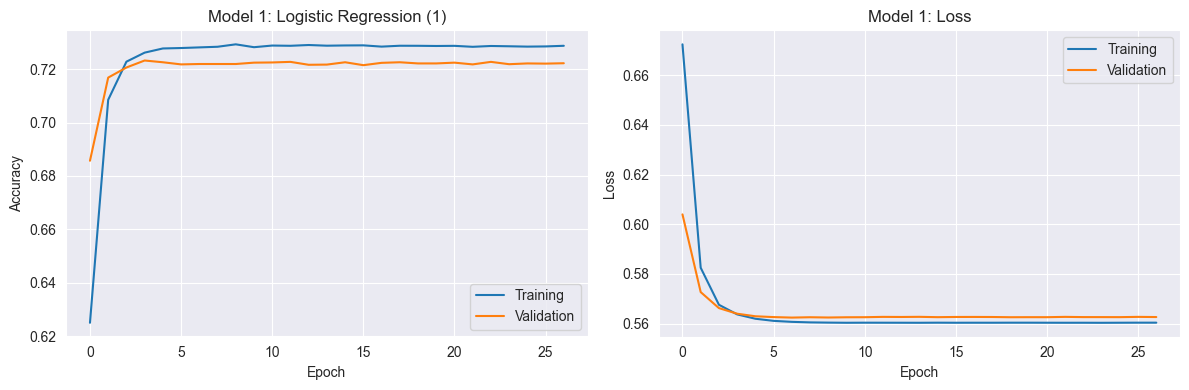

In [23]:
# Learning curves
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title('Model 1: Logistic Regression (1)')
plt.legend(['Training', 'Validation'], loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title('Model 1: Loss')
plt.legend(['Training', 'Validation'], loc='upper right')

plt.tight_layout()
plt.savefig('plots/model1_learning_curvesF.png', dpi=150)
plt.show()

In [24]:
# Evaluate on training data
scores1_train = model1.evaluate(XTRAIN, YTRAIN)
print('Training - %s: %.2f%%' % (model1.metrics_names[1], scores1_train[1]*100))

# Evaluate on validation data
scores1_val = model1.evaluate(XVALIDATION, YVALIDATION)
print('Validation - %s: %.2f%%' % (model1.metrics_names[1], scores1_val[1]*100))

1718/1718 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7288 - loss: 0.5604
Training - compile_metrics: 72.88%
430/430 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7219 - loss: 0.5624
Validation - compile_metrics: 72.19%


## 17) Model 2: 4-1 Network

In [25]:
# build the model
model2 = Sequential()
model2.add(Dense(4, input_dim=len(XTRAIN[0, :]), activation='relu'))
model2.add(Dense(1, activation='sigmoid'))
print(model2.summary())

/Users/victoriast.john/.pyenv/versions/3.11.13/lib/python3.11/site-packages/keras/src/layers/core/dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 4)              │            48 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 53 (212.00 B)

 Trainable params: 53 (212.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [26]:
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

callback_a = ModelCheckpoint(filepath='model2_best.weights.h5', monitor='val_loss', save_best_only=True, save_weights_only=True, verbose=1)
callback_b = EarlyStopping(monitor='val_loss', mode='min', patience=20, verbose=1)

history2 = model2.fit(XTRAIN, YTRAIN, validation_data=(XVALIDATION, YVALIDATION), epochs=100, batch_size=128, callbacks=[callback_a, callback_b])

Epoch 1/100
421/430 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5436 - loss: 0.7310
Epoch 1: val_loss improved from None to 0.61618, saving model to model2_best.weights.h5
430/430 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6126 - loss: 0.6738 - val_accuracy: 0.7058 - val_loss: 0.6162
Epoch 2/100
400/430 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7186 - loss: 0.6036
Epoch 2: val_loss improved from 0.61618 to 0.58847, saving model to model2_best.weights.h5
430/430 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7187 - loss: 0.5992 - val_accuracy: 0.7230 - val_loss: 0.5885
Epoch 3/100
405/430 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7249 - loss: 0.5843
Epoch 3: val_loss improved from 0.58847 to 0.56630, saving model to model2_best.weights.h5
430/430 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7247 - loss: 0.5773 - val_accuracy: 0.7248 - val_loss: 0.5663
Epoch 4/100
410/430 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7250 - loss: 0.5656
Epoch 4: val_loss improved from

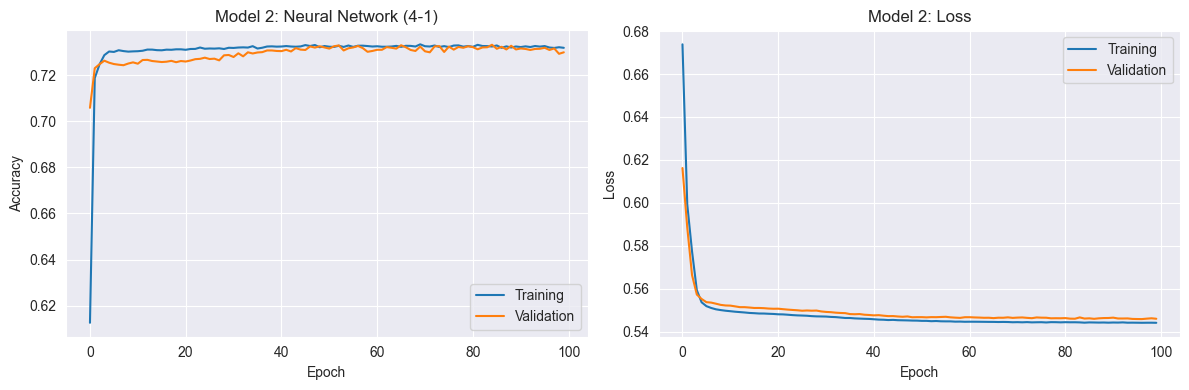

In [27]:
model2.load_weights('model2_best.weights.h5')

# Learning curves
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title('Model 2: Neural Network (4-1)')
plt.legend(['Training', 'Validation'], loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title('Model 2: Loss')
plt.legend(['Training', 'Validation'], loc='upper right')

plt.tight_layout()
plt.savefig('plots/model2_learning_curvesF.png', dpi=150)
plt.show()

In [28]:
scores2_train = model2.evaluate(XTRAIN, YTRAIN)
print('Training - %s: %.2f%%' % (model2.metrics_names[1], scores2_train[1]*100))

scores2_val = model2.evaluate(XVALIDATION, YVALIDATION)
print('Validation - %s: %.2f%%' % (model2.metrics_names[1], scores2_val[1]*100))

1718/1718 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7322 - loss: 0.5437
Training - compile_metrics: 73.22%
430/430 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7310 - loss: 0.5458
Validation - compile_metrics: 73.10%


## 18) Model 3: 8-1 Network

In [29]:
model3 = Sequential()
model3.add(Dense(8, input_dim=len(XTRAIN[0, :]), activation='relu'))
model3.add(Dense(1, activation='sigmoid'))
print(model3.summary())

/Users/victoriast.john/.pyenv/versions/3.11.13/lib/python3.11/site-packages/keras/src/layers/core/dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 8)              │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 105 (420.00 B)

 Trainable params: 105 (420.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [30]:
model3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

callback_a = ModelCheckpoint(filepath='model3_best.weights.h5', monitor='val_loss', save_best_only=True, save_weights_only=True, verbose=1)
callback_b = EarlyStopping(monitor='val_loss', mode='min', patience=20, verbose=1)

history3 = model3.fit(XTRAIN, YTRAIN, validation_data=(XVALIDATION, YVALIDATION), epochs=100, batch_size=128, callbacks=[callback_a, callback_b])

Epoch 1/100
393/430 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5169 - loss: 0.7826
Epoch 1: val_loss improved from None to 0.57782, saving model to model3_best.weights.h5
430/430 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6145 - loss: 0.6702 - val_accuracy: 0.7133 - val_loss: 0.5778
Epoch 2/100
416/430 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7208 - loss: 0.5678
Epoch 2: val_loss improved from 0.57782 to 0.56214, saving model to model3_best.weights.h5
430/430 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7211 - loss: 0.5665 - val_accuracy: 0.7208 - val_loss: 0.5621
Epoch 3/100
396/430 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7291 - loss: 0.5558
Epoch 3: val_loss improved from 0.56214 to 0.55762, saving model to model3_best.weights.h5
430/430 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7278 - loss: 0.5568 - val_accuracy: 0.7239 - val_loss: 0.5576
Epoch 4/100
429/430 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7312 - loss: 0.5501
Epoch 4: val_loss improved from

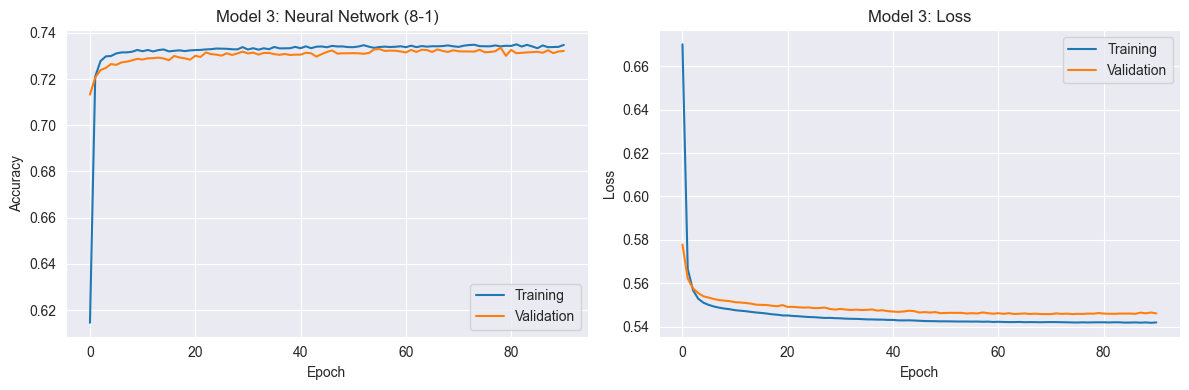

In [31]:
model3.load_weights('model3_best.weights.h5')

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title('Model 3: Neural Network (8-1)')
plt.legend(['Training', 'Validation'], loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title('Model 3: Loss')
plt.legend(['Training', 'Validation'], loc='upper right')

plt.tight_layout()
plt.savefig('plots/model3_learning_curvesF.png', dpi=150)
plt.show()

In [32]:
scores3_train = model3.evaluate(XTRAIN, YTRAIN)
print('Training - %s: %.2f%%' % (model3.metrics_names[1], scores3_train[1]*100))

scores3_val = model3.evaluate(XVALIDATION, YVALIDATION)
print('Validation - %s: %.2f%%' % (model3.metrics_names[1], scores3_val[1]*100))

1718/1718 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7344 - loss: 0.5416
Training - compile_metrics: 73.44%
430/430 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7320 - loss: 0.5457
Validation - compile_metrics: 73.20%


## 19) Model 4: 8-4-1 Network

In [33]:
model4 = Sequential()
model4.add(Dense(8, input_dim=len(XTRAIN[0, :]), activation='relu'))
model4.add(Dense(4, activation='relu'))
model4.add(Dense(1, activation='sigmoid'))
print(model4.summary())

/Users/victoriast.john/.pyenv/versions/3.11.13/lib/python3.11/site-packages/keras/src/layers/core/dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 8)              │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 137 (548.00 B)

 Trainable params: 137 (548.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [34]:
model4.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

callback_a = ModelCheckpoint(filepath='model4_best.weights.h5', monitor='val_loss', save_best_only=True, save_weights_only=True, verbose=1)
callback_b = EarlyStopping(monitor='val_loss', mode='min', patience=20, verbose=1)

history4 = model4.fit(XTRAIN, YTRAIN, validation_data=(XVALIDATION, YVALIDATION), epochs=100, batch_size=128, callbacks=[callback_a, callback_b])

Epoch 1/100
424/430 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6498 - loss: 0.6291
Epoch 1: val_loss improved from None to 0.56682, saving model to model4_best.weights.h5
430/430 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6891 - loss: 0.5993 - val_accuracy: 0.7194 - val_loss: 0.5668
Epoch 2/100
418/430 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7236 - loss: 0.5629
Epoch 2: val_loss improved from 0.56682 to 0.55355, saving model to model4_best.weights.h5
430/430 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7263 - loss: 0.5586 - val_accuracy: 0.7272 - val_loss: 0.5535
Epoch 3/100
411/430 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7340 - loss: 0.5489
Epoch 3: val_loss improved from 0.55355 to 0.55056, saving model to model4_best.weights.h5
430/430 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7295 - loss: 0.5512 - val_accuracy: 0.7275 - val_loss: 0.5506
Epoch 4/100
400/430 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7308 - loss: 0.5497
Epoch 4: val_loss improved from

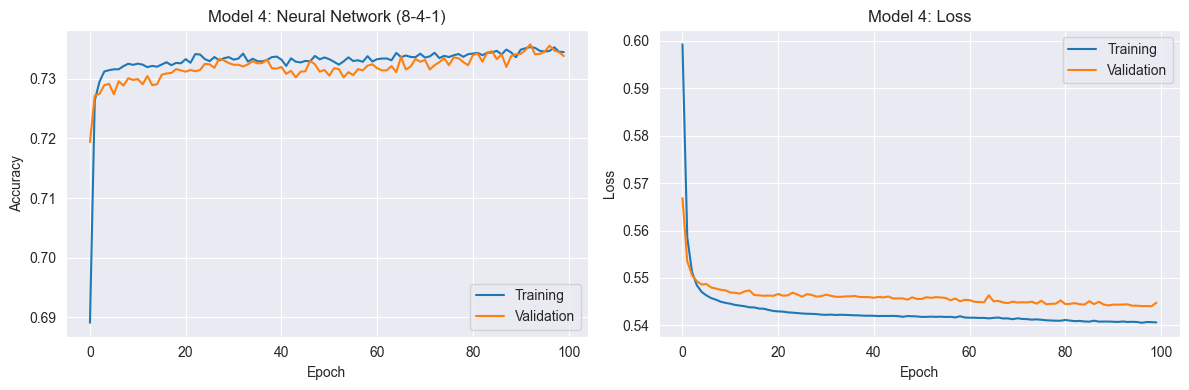

In [35]:
model4.load_weights('model4_best.weights.h5')

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history4.history['accuracy'])
plt.plot(history4.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title('Model 4: Neural Network (8-4-1)')
plt.legend(['Training', 'Validation'], loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title('Model 4: Loss')
plt.legend(['Training', 'Validation'], loc='upper right')

plt.tight_layout()
plt.savefig('plots/model4_learning_curvesF.png', dpi=150)
plt.show()

In [36]:
scores4_train = model4.evaluate(XTRAIN, YTRAIN)
print('Training - %s: %.2f%%' % (model4.metrics_names[1], scores4_train[1]*100))

scores4_val = model4.evaluate(XVALIDATION, YVALIDATION)
print('Validation - %s: %.2f%%' % (model4.metrics_names[1], scores4_val[1]*100))

1718/1718 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7350 - loss: 0.5401
Training - compile_metrics: 73.50%
430/430 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7344 - loss: 0.5440
Validation - compile_metrics: 73.44%


## 20) Model 5: 16-8-1 Network

In [37]:
model5 = Sequential()
model5.add(Dense(16, input_dim=len(XTRAIN[0, :]), activation='relu'))
model5.add(Dense(8, activation='relu'))
model5.add(Dense(1, activation='sigmoid'))
print(model5.summary())

/Users/victoriast.john/.pyenv/versions/3.11.13/lib/python3.11/site-packages/keras/src/layers/core/dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 16)             │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 337 (1.32 KB)

 Trainable params: 337 (1.32 KB)

 Non-trainable params: 0 (0.00 B)

None


In [38]:
model5.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

callback_a = ModelCheckpoint(filepath='model5_best.weights.h5', monitor='val_loss', save_best_only=True, save_weights_only=True, verbose=1)
callback_b = EarlyStopping(monitor='val_loss', mode='min', patience=20, verbose=1)

history5 = model5.fit(XTRAIN, YTRAIN, validation_data=(XVALIDATION, YVALIDATION), epochs=100, batch_size=128, callbacks=[callback_a, callback_b])

Epoch 1/100
405/430 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6404 - loss: 0.6308
Epoch 1: val_loss improved from None to 0.56268, saving model to model5_best.weights.h5
430/430 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6899 - loss: 0.5925 - val_accuracy: 0.7184 - val_loss: 0.5627
Epoch 2/100
423/430 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7250 - loss: 0.5573
Epoch 2: val_loss improved from 0.56268 to 0.55497, saving model to model5_best.weights.h5
430/430 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7277 - loss: 0.5546 - val_accuracy: 0.7242 - val_loss: 0.5550
Epoch 3/100
406/430 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7295 - loss: 0.5513
Epoch 3: val_loss improved from 0.55497 to 0.55242, saving model to model5_best.weights.h5
430/430 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7302 - loss: 0.5496 - val_accuracy: 0.7267 - val_loss: 0.5524
Epoch 4/100
426/430 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7334 - loss: 0.5476
Epoch 4: val_loss improved from

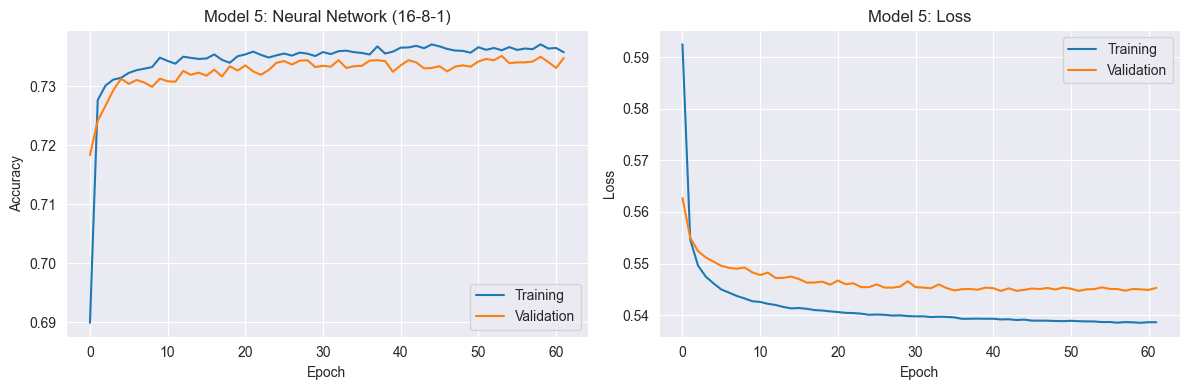

In [39]:
model5.load_weights('model5_best.weights.h5')

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history5.history['accuracy'])
plt.plot(history5.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title('Model 5: Neural Network (16-8-1)')
plt.legend(['Training', 'Validation'], loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(history5.history['loss'])
plt.plot(history5.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title('Model 5: Loss')
plt.legend(['Training', 'Validation'], loc='upper right')

plt.tight_layout()
plt.savefig('plots/model5_learning_curvesF.png', dpi=150)
plt.show()

In [40]:
scores5_train = model5.evaluate(XTRAIN, YTRAIN)
print('Training - %s: %.2f%%' % (model5.metrics_names[1], scores5_train[1]*100))

scores5_val = model5.evaluate(XVALIDATION, YVALIDATION)
print('Validation - %s: %.2f%%' % (model5.metrics_names[1], scores5_val[1]*100))

1718/1718 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7370 - loss: 0.5382
Training - compile_metrics: 73.70%
430/430 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7344 - loss: 0.5447
Validation - compile_metrics: 73.44%


## 21) Model 6: 16-8-4-1 Network
This is the largest model we'll test (smaller than the Phase 3 overfitting model)

In [41]:
model6 = Sequential()
model6.add(Dense(16, input_dim=len(XTRAIN[0, :]), activation='relu'))
model6.add(Dense(8, activation='relu'))
model6.add(Dense(4, activation='relu'))
model6.add(Dense(1, activation='sigmoid'))
print(model6.summary())

/Users/victoriast.john/.pyenv/versions/3.11.13/lib/python3.11/site-packages/keras/src/layers/core/dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_11 (Dense)                │ (None, 16)             │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 369 (1.44 KB)

 Trainable params: 369 (1.44 KB)

 Non-trainable params: 0 (0.00 B)

None


In [42]:
model6.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

callback_a = ModelCheckpoint(filepath='model6_best.weights.h5', monitor='val_loss', save_best_only=True, save_weights_only=True, verbose=1)
callback_b = EarlyStopping(monitor='val_loss', mode='min', patience=20, verbose=1)

history6 = model6.fit(XTRAIN, YTRAIN, validation_data=(XVALIDATION, YVALIDATION), epochs=100, batch_size=128, callbacks=[callback_a, callback_b])

Epoch 1/100
404/430 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6271 - loss: 0.6501
Epoch 1: val_loss improved from None to 0.59615, saving model to model6_best.weights.h5
430/430 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6870 - loss: 0.6246 - val_accuracy: 0.7197 - val_loss: 0.5962
Epoch 2/100
422/430 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7248 - loss: 0.5842
Epoch 2: val_loss improved from 0.59615 to 0.55599, saving model to model6_best.weights.h5
430/430 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7287 - loss: 0.5699 - val_accuracy: 0.7280 - val_loss: 0.5560
Epoch 3/100
403/430 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7275 - loss: 0.5552
Epoch 3: val_loss improved from 0.55599 to 0.55177, saving model to model6_best.weights.h5
430/430 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7310 - loss: 0.5503 - val_accuracy: 0.7283 - val_loss: 0.5518
Epoch 4/100
421/430 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7340 - loss: 0.5463
Epoch 4: val_loss improved from

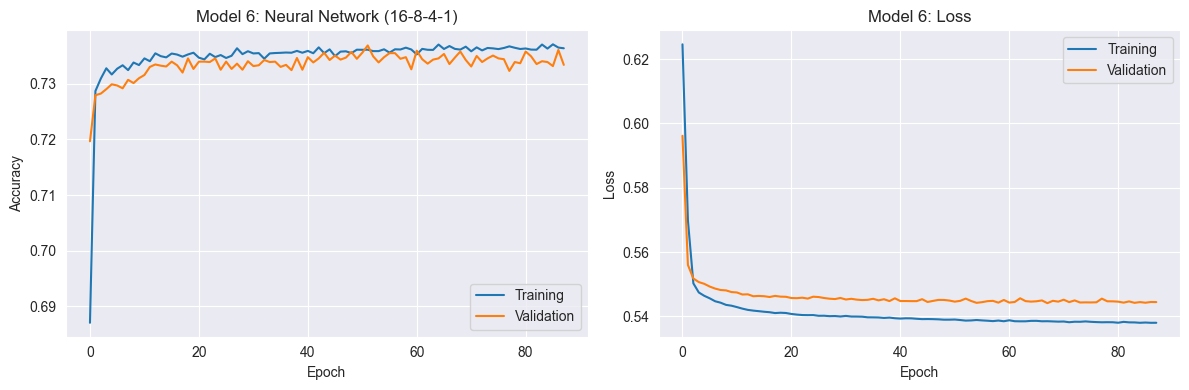

In [43]:
model6.load_weights('model6_best.weights.h5')

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history6.history['accuracy'])
plt.plot(history6.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title('Model 6: Neural Network (16-8-4-1)')
plt.legend(['Training', 'Validation'], loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(history6.history['loss'])
plt.plot(history6.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title('Model 6: Loss')
plt.legend(['Training', 'Validation'], loc='upper right')

plt.tight_layout()
plt.savefig('plots/model6_learning_curvesF.png', dpi=150)
plt.show()

In [44]:
scores6_train = model6.evaluate(XTRAIN, YTRAIN)
print('Training - %s: %.2f%%' % (model6.metrics_names[1], scores6_train[1]*100))

scores6_val = model6.evaluate(XVALIDATION, YVALIDATION)
print('Validation - %s: %.2f%%' % (model6.metrics_names[1], scores6_val[1]*100))

1718/1718 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7375 - loss: 0.5375
Training - compile_metrics: 73.75%
430/430 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7347 - loss: 0.5441
Validation - compile_metrics: 73.47%


# 22) Results Summary

In [45]:
## Results Summary Table
# Create summary table
results = {
    'Model': ['Random Baseline', 'Logistic Regression (1)', 'Neural Network (4-1)',
              'Neural Network (8-1)', 'Neural Network (8-4-1)',
              'Neural Network (16-8-1)', 'Neural Network (16-8-4-1)'],
    'Architecture': ['-', '1', '4-1', '8-1', '8-4-1', '16-8-1', '16-8-4-1'],
    'Acc. on Training Set': [f'{majority_class_ratio:.2%}',
                              f'{scores1_train[1]:.2%}', f'{scores2_train[1]:.2%}',
                              f'{scores3_train[1]:.2%}', f'{scores4_train[1]:.2%}',
                              f'{scores5_train[1]:.2%}', f'{scores6_train[1]:.2%}'],
    'Acc. on Validation Set': [f'{majority_class_ratio:.2%}',
                                f'{scores1_val[1]:.2%}', f'{scores2_val[1]:.2%}',
                                f'{scores3_val[1]:.2%}', f'{scores4_val[1]:.2%}',
                                f'{scores5_val[1]:.2%}', f'{scores6_val[1]:.2%}']
}

results_df = pd.DataFrame(results)
print(results_df.to_string(index=False))

                    Model Architecture Acc. on Training Set Acc. on Validation Set
          Random Baseline            -               50.59%                 50.59%
  Logistic Regression (1)            1               72.88%                 72.19%
     Neural Network (4-1)          4-1               73.22%                 73.10%
     Neural Network (8-1)          8-1               73.44%                 73.20%
   Neural Network (8-4-1)        8-4-1               73.50%                 73.44%
  Neural Network (16-8-1)       16-8-1               73.70%                 73.44%
Neural Network (16-8-4-1)     16-8-4-1               73.75%                 73.47%


In [46]:
# Save to CSV
results_df.to_csv('plots/model_comparison_resultsF.csv', index=False)
print('Results saved to plots/model_comparison_resultsF.csv')

Results saved to plots/model_comparison_resultsF.csv


## 23) Select Best Model
The best model is the one with the highest validation accuracy.

In [47]:
# Find best model based on validation accuracy
val_accuracies = {
    'Logistic Regression (1)': scores1_val[1],
    'Neural Network (4-1)': scores2_val[1],
    'Neural Network (8-1)': scores3_val[1],
    'Neural Network (8-4-1)': scores4_val[1],
    'Neural Network (16-8-1)': scores5_val[1],
    'Neural Network (16-8-4-1)': scores6_val[1]
}

best_model_name = max(val_accuracies, key=val_accuracies.get)
best_val_acc = val_accuracies[best_model_name]

print('='*60)
print(f'BEST MODEL: {best_model_name}')
print(f'Validation Accuracy: {best_val_acc:.2%}')
print('='*60)

BEST MODEL: Neural Network (16-8-4-1)
Validation Accuracy: 73.47%


## 24) Precision, Recall, and F1 Score
Evaluate the best model using additional metrics

In [48]:
# Get predictions from all models
pred1 = model1.predict(XVALIDATION)
pred2 = model2.predict(XVALIDATION)
pred3 = model3.predict(XVALIDATION)
pred4 = model4.predict(XVALIDATION)
pred5 = model5.predict(XVALIDATION)
pred6 = model6.predict(XVALIDATION)

430/430 ━━━━━━━━━━━━━━━━━━━━ 0s 861us/step
430/430 ━━━━━━━━━━━━━━━━━━━━ 0s 889us/step
430/430 ━━━━━━━━━━━━━━━━━━━━ 0s 874us/step
430/430 ━━━━━━━━━━━━━━━━━━━━ 0s 867us/step
430/430 ━━━━━━━━━━━━━━━━━━━━ 0s 853us/step
430/430 ━━━━━━━━━━━━━━━━━━━━ 0s 917us/step


In [49]:
# Calculate metrics for all models
def get_metrics(y_true, y_pred):
    return {
        'accuracy': accuracy_score(y_true, y_pred.round()),
        'precision': precision_score(y_true, y_pred.round()),
        'recall': recall_score(y_true, y_pred.round()),
        'f1': f1_score(y_true, y_pred.round())
    }

metrics1 = get_metrics(YVALIDATION, pred1)
metrics2 = get_metrics(YVALIDATION, pred2)
metrics3 = get_metrics(YVALIDATION, pred3)
metrics4 = get_metrics(YVALIDATION, pred4)
metrics5 = get_metrics(YVALIDATION, pred5)
metrics6 = get_metrics(YVALIDATION, pred6)

In [50]:
# Print metrics for all models
print('Model 1 - Logistic Regression (1):')
print(f"  Accuracy: {metrics1['accuracy']:.2%}")
print(f"  Precision: {metrics1['precision']:.2%}")
print(f"  Recall: {metrics1['recall']:.2%}")
print(f"  F1-score: {metrics1['f1']:.4f}")

print('\nModel 2 - Neural Network (4-1):')
print(f"  Accuracy: {metrics2['accuracy']:.2%}")
print(f"  Precision: {metrics2['precision']:.2%}")
print(f"  Recall: {metrics2['recall']:.2%}")
print(f"  F1-score: {metrics2['f1']:.4f}")

print('\nModel 3 - Neural Network (8-1):')
print(f"  Accuracy: {metrics3['accuracy']:.2%}")
print(f"  Precision: {metrics3['precision']:.2%}")
print(f"  Recall: {metrics3['recall']:.2%}")
print(f"  F1-score: {metrics3['f1']:.4f}")

print('\nModel 4 - Neural Network (8-4-1):')
print(f"  Accuracy: {metrics4['accuracy']:.2%}")
print(f"  Precision: {metrics4['precision']:.2%}")
print(f"  Recall: {metrics4['recall']:.2%}")
print(f"  F1-score: {metrics4['f1']:.4f}")

print('\nModel 5 - Neural Network (16-8-1):')
print(f"  Accuracy: {metrics5['accuracy']:.2%}")
print(f"  Precision: {metrics5['precision']:.2%}")
print(f"  Recall: {metrics5['recall']:.2%}")
print(f"  F1-score: {metrics5['f1']:.4f}")

print('\nModel 6 - Neural Network (16-8-4-1):')
print(f"  Accuracy: {metrics6['accuracy']:.2%}")
print(f"  Precision: {metrics6['precision']:.2%}")
print(f"  Recall: {metrics6['recall']:.2%}")
print(f"  F1-score: {metrics6['f1']:.4f}")

Model 1 - Logistic Regression (1):
  Accuracy: 72.19%
  Precision: 74.62%
  Recall: 66.25%
  F1-score: 0.7019

Model 2 - Neural Network (4-1):
  Accuracy: 73.10%
  Precision: 74.90%
  Recall: 68.49%
  F1-score: 0.7155

Model 3 - Neural Network (8-1):
  Accuracy: 73.20%
  Precision: 74.10%
  Recall: 70.35%
  F1-score: 0.7218

Model 4 - Neural Network (8-4-1):
  Accuracy: 73.44%
  Precision: 74.96%
  Recall: 69.45%
  F1-score: 0.7210

Model 5 - Neural Network (16-8-1):
  Accuracy: 73.44%
  Precision: 74.79%
  Recall: 69.77%
  F1-score: 0.7219

Model 6 - Neural Network (16-8-4-1):
  Accuracy: 73.47%
  Precision: 75.35%
  Recall: 68.83%
  F1-score: 0.7194


## 25) Extended Results Table with All Metrics

In [51]:
# Create comprehensive results table
full_results = {
    'Model': ['Logistic Regression (1)', 'Neural Network (4-1)',
              'Neural Network (8-1)', 'Neural Network (8-4-1)',
              'Neural Network (16-8-1)', 'Neural Network (16-8-4-1)'],
    'Train Acc': [f"{scores1_train[1]:.2%}", f"{scores2_train[1]:.2%}",
                  f"{scores3_train[1]:.2%}", f"{scores4_train[1]:.2%}",
                  f"{scores5_train[1]:.2%}", f"{scores6_train[1]:.2%}"],
    'Val Acc': [f"{metrics1['accuracy']:.2%}", f"{metrics2['accuracy']:.2%}",
                f"{metrics3['accuracy']:.2%}", f"{metrics4['accuracy']:.2%}",
                f"{metrics5['accuracy']:.2%}", f"{metrics6['accuracy']:.2%}"],
    'Precision': [f"{metrics1['precision']:.2%}", f"{metrics2['precision']:.2%}",
                  f"{metrics3['precision']:.2%}", f"{metrics4['precision']:.2%}",
                  f"{metrics5['precision']:.2%}", f"{metrics6['precision']:.2%}"],
    'Recall': [f"{metrics1['recall']:.2%}", f"{metrics2['recall']:.2%}",
               f"{metrics3['recall']:.2%}", f"{metrics4['recall']:.2%}",
               f"{metrics5['recall']:.2%}", f"{metrics6['recall']:.2%}"],
    'F1': [f"{metrics1['f1']:.4f}", f"{metrics2['f1']:.4f}",
           f"{metrics3['f1']:.4f}", f"{metrics4['f1']:.4f}",
           f"{metrics5['f1']:.4f}", f"{metrics6['f1']:.4f}"]
}

full_results_df = pd.DataFrame(full_results)
print(full_results_df.to_string(index=False))

                    Model Train Acc Val Acc Precision Recall     F1
  Logistic Regression (1)    72.88%  72.19%    74.62% 66.25% 0.7019
     Neural Network (4-1)    73.22%  73.10%    74.90% 68.49% 0.7155
     Neural Network (8-1)    73.44%  73.20%    74.10% 70.35% 0.7218
   Neural Network (8-4-1)    73.50%  73.44%    74.96% 69.45% 0.7210
  Neural Network (16-8-1)    73.70%  73.44%    74.79% 69.77% 0.7219
Neural Network (16-8-4-1)    73.75%  73.47%    75.35% 68.83% 0.7194


In [52]:
full_results_df.to_csv('plots/full_model_comparisonF.csv', index=False)
print('Full results saved to plots/full_model_comparisonF.csv')

Full results saved to plots/full_model_comparisonF.csv


## 26) Model Comparison Bar Chart

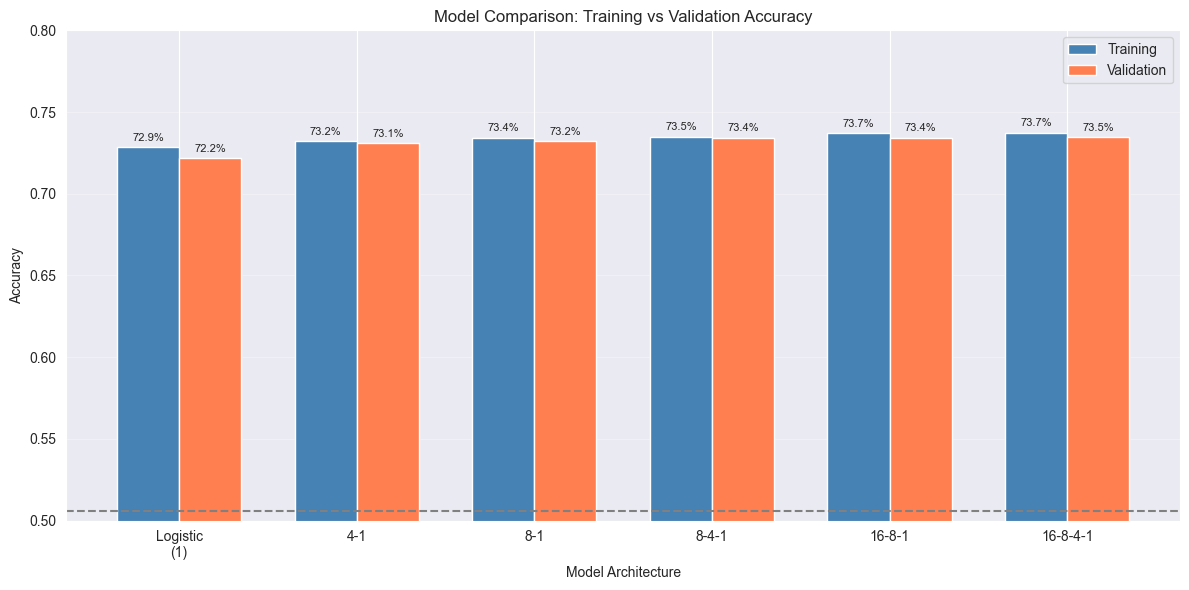

In [53]:
# Create comparison bar chart
models = ['Logistic\n(1)', '4-1', '8-1', '8-4-1', '16-8-1', '16-8-4-1']
train_accs = [scores1_train[1], scores2_train[1], scores3_train[1],
              scores4_train[1], scores5_train[1], scores6_train[1]]
val_accs = [scores1_val[1], scores2_val[1], scores3_val[1],
            scores4_val[1], scores5_val[1], scores6_val[1]]

x = np.arange(len(models))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 6))
bars1 = ax.bar(x - width/2, train_accs, width, label='Training', color='steelblue')
bars2 = ax.bar(x + width/2, val_accs, width, label='Validation', color='coral')

ax.set_xlabel('Model Architecture')
ax.set_ylabel('Accuracy')
ax.set_title('Model Comparison: Training vs Validation Accuracy')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()
ax.set_ylim([0.5, 0.8])  # Focus on relevant range
ax.axhline(y=majority_class_ratio, color='gray', linestyle='--', label='Random Baseline')
ax.grid(True, alpha=0.3, axis='y')

# Add value labels
for bar in bars1:
    height = bar.get_height()
    ax.annotate(f'{height:.1%}', xy=(bar.get_x() + bar.get_width()/2, height),
                xytext=(0, 3), textcoords='offset points', ha='center', va='bottom', fontsize=8)

for bar in bars2:
    height = bar.get_height()
    ax.annotate(f'{height:.1%}', xy=(bar.get_x() + bar.get_width()/2, height),
                xytext=(0, 3), textcoords='offset points', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.savefig('plots/model_comparison_bar_chartF.png', dpi=150)
plt.show()

## 27) Best model details

In [54]:
# Map to get best model object and predictions
model_map = {
    'Logistic Regression (1)': (model1, pred1, metrics1),
    'Neural Network (4-1)': (model2, pred2, metrics2),
    'Neural Network (8-1)': (model3, pred3, metrics3),
    'Neural Network (8-4-1)': (model4, pred4, metrics4),
    'Neural Network (16-8-1)': (model5, pred5, metrics5),
    'Neural Network (16-8-4-1)': (model6, pred6, metrics6)
}

best_model, best_pred, best_metrics = model_map[best_model_name]

print('='*60)
print(f'BEST MODEL: {best_model_name}')
print('='*60)
print(f"Accuracy:  {best_metrics['accuracy']:.2%}")
print(f"Precision: {best_metrics['precision']:.2%}")
print(f"Recall:    {best_metrics['recall']:.2%}")
print(f"F1 Score:  {best_metrics['f1']:.4f}")
print('='*60)

BEST MODEL: Neural Network (16-8-4-1)
Accuracy:  73.47%
Precision: 75.35%
Recall:    68.83%
F1 Score:  0.7194


## 28) Prediction Distribution for Best Model

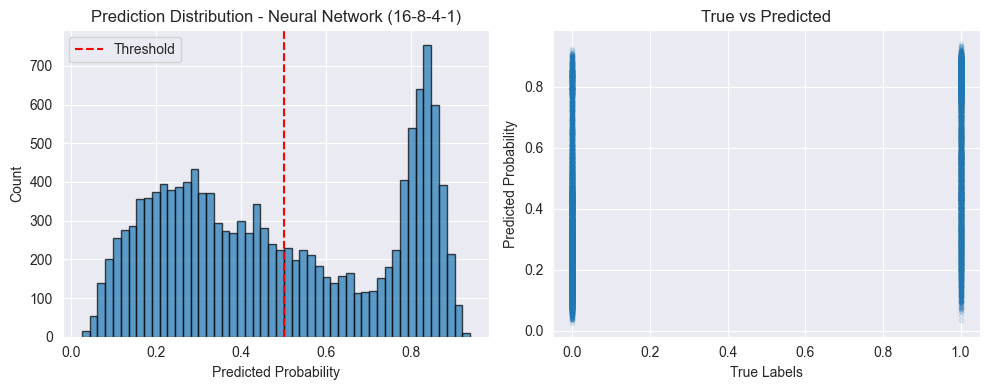

In [55]:
# Show prediction distribution
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.hist(best_pred, bins=50, edgecolor='black', alpha=0.7)
plt.xlabel('Predicted Probability')
plt.ylabel('Count')
plt.title(f'Prediction Distribution - {best_model_name}')
plt.axvline(x=0.5, color='red', linestyle='--', label='Threshold')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(YVALIDATION, best_pred, '.', alpha=0.1)
plt.xlabel('True Labels')
plt.ylabel('Predicted Probability')
plt.title('True vs Predicted')

plt.tight_layout()
plt.savefig('plots/best_model_predictionsF.png', dpi=150)
plt.show()

In [56]:
# keep unnormalized copies for Phase 5
XTRAIN_UNNORM = dataset[index_20percent:, :-1]
XVALIDATION_UNNORM = dataset[:index_20percent, :-1]

## Summary Phase 4

So basically I tried 6 different models ranging from simple logistic regression up to a 4-layer network. They all did pretty similar actually, somewhere around 72-73% accuracy. The 16-8-1 model ended up being the best by a small margin.

Interesting thing is that the bigger models didn't really do better. The simple 16-8-4-1 did slightly worse most likely due to overfitting.

In [57]:
# final results
print('\n' + '='*60)
print('PHASE 4 COMPLETE')
print('='*60)
print(f'Best Model: {best_model_name}')
print(f'Best Validation Accuracy: {best_val_acc:.2%}')
print(f'Random Baseline: {majority_class_ratio:.2%}')
print(f'Improvement over baseline: {(best_val_acc - majority_class_ratio)*100:.1f} percentage points')
print('='*60)


PHASE 4 COMPLETE
Best Model: Neural Network (16-8-4-1)
Best Validation Accuracy: 73.47%
Random Baseline: 50.59%
Improvement over baseline: 22.9 percentage points


# Phase 5
Feature Importance

## 29) Function to test single features

In [58]:
def train_single_feature(feature_idx, feature_name):
    # grab just one column
    X_train_single = XTRAIN_UNNORM[:, feature_idx].reshape(-1, 1)
    X_val_single = XVALIDATION_UNNORM[:, feature_idx].reshape(-1, 1)

    # normalize
    mean = X_train_single.mean()
    std = X_train_single.std()
    if std == 0:
        std = 1

    X_train_norm = (X_train_single - mean) / std
    X_val_norm = (X_val_single - mean) / std

    # 8-1 model like before
    model = Sequential()
    model.add(Dense(8, input_dim=1, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    checkpoint_path = f'single_{feature_name}.weights.h5'
    callback_a = ModelCheckpoint(filepath=checkpoint_path, monitor='val_loss',
                                  save_best_only=True, save_weights_only=True, verbose=0)
    callback_b = EarlyStopping(monitor='val_loss', mode='min', patience=10, verbose=0)

    model.fit(X_train_norm, YTRAIN, validation_data=(X_val_norm, YVALIDATION),
              epochs=50, batch_size=128, callbacks=[callback_a, callback_b], verbose=0)

    model.load_weights(checkpoint_path)
    scores = model.evaluate(X_val_norm, YVALIDATION, verbose=0)
    return scores[1]

## 30) Test each feature by itself

In [59]:
print("Testing each feature individually...")
print("-" * 40)

single_accuracies = {}

for i, feat in enumerate(feature_cols):
    acc = train_single_feature(i, feat)
    single_accuracies[feat] = acc
    print(f'{feat}: {acc*100:.2f}%')

Testing each feature individually...
----------------------------------------


/Users/victoriast.john/.pyenv/versions/3.11.13/lib/python3.11/site-packages/keras/src/layers/core/dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


age: 59.28%
gender: 50.59%
height: 50.68%
weight: 57.94%
ap_hi: 71.09%
ap_lo: 66.20%
cholesterol: 58.85%
gluc: 53.54%
smoke: 50.59%
alco: 50.59%
active: 51.98%


## 31) Rank results

In [60]:
sorted_features = sorted(single_accuracies.items(), key=lambda x: x[1], reverse=True)

print("\nRanked from best to worst:")
for i, (feat, acc) in enumerate(sorted_features, 1):
    print(f'{i}. {feat}: {acc*100:.2f}%')


Ranked from best to worst:
1. ap_hi: 71.09%
2. ap_lo: 66.20%
3. age: 59.28%
4. cholesterol: 58.85%
5. weight: 57.94%
6. gluc: 53.54%
7. active: 51.98%
8. height: 50.68%
9. gender: 50.59%
10. smoke: 50.59%
11. alco: 50.59%


## 32 Plot single feature

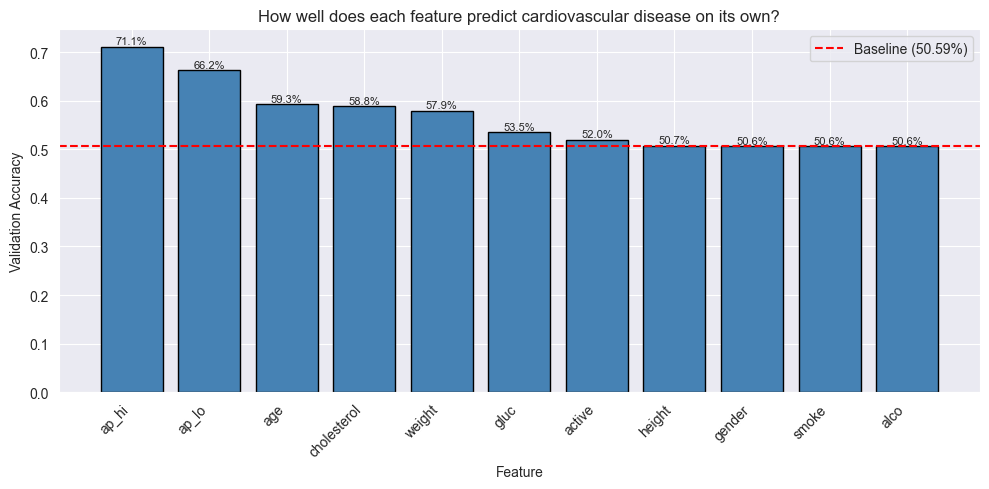

In [61]:
plt.figure(figsize=(10, 5))
features_sorted = [f[0] for f in sorted_features]
accs_sorted = [f[1] for f in sorted_features]

plt.bar(features_sorted, accs_sorted, color='steelblue', edgecolor='black')
plt.xlabel('Feature')
plt.ylabel('Validation Accuracy')
plt.title('How well does each feature predict cardiovascular disease on its own?')
plt.xticks(rotation=45, ha='right')
plt.axhline(y=majority_class_ratio, color='red', linestyle='--', label=f'Baseline ({majority_class_ratio:.2%})')
plt.legend()

for i, acc in enumerate(accs_sorted):
    plt.text(i, acc + 0.005, f'{acc*100:.1f}%', ha='center', fontsize=8)

plt.tight_layout()
plt.savefig(os.path.join(PLOTS_DIR, 'single_feature_importance.png'), dpi=150)
plt.show()

## 33) Function to train with multiple features

In [62]:
def train_with_features(feature_list, name):
    # get column indices
    indices = [feature_cols.index(f) for f in feature_list]

    X_tr = XTRAIN_UNNORM[:, indices]
    X_va = XVALIDATION_UNNORM[:, indices]

    # normalize
    mean = X_tr.mean(axis=0)
    std = X_tr.std(axis=0)
    std[std == 0] = 1

    X_tr_norm = (X_tr - mean) / std
    X_va_norm = (X_va - mean) / std

    model = Sequential()
    model.add(Dense(8, input_dim=len(feature_list), activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    checkpoint_path = f'{name}.weights.h5'
    callback_a = ModelCheckpoint(filepath=checkpoint_path, monitor='val_loss',
                                  save_best_only=True, save_weights_only=True, verbose=0)
    callback_b = EarlyStopping(monitor='val_loss', mode='min', patience=20, verbose=0)

    model.fit(X_tr_norm, YTRAIN, validation_data=(X_va_norm, YVALIDATION),
              epochs=100, batch_size=128, callbacks=[callback_a, callback_b], verbose=0)

    model.load_weights(checkpoint_path)
    train_acc = model.evaluate(X_tr_norm, YTRAIN, verbose=0)[1]
    val_acc = model.evaluate(X_va_norm, YVALIDATION, verbose=0)[1]

    return train_acc, val_acc

## 34) Remove features one at a time

In [63]:
features_worst_to_best = [f[0] for f in reversed(sorted_features)]
print("Order ill remove them:", features_worst_to_best)

print("\nRemoving features one by one...")

results = []

# start with all 11
train_acc, val_acc = train_with_features(feature_cols, 'all_features')
results.append({
    'n_features': 11,
    'removed': 'none',
    'train_acc': train_acc,
    'val_acc': val_acc
})
print(f"11 features (all): val acc = {val_acc*100:.2f}%")

# remove one at a time
current_features = feature_cols.copy()
for feat_to_remove in features_worst_to_best[:-1]:
    current_features.remove(feat_to_remove)
    train_acc, val_acc = train_with_features(current_features, f'removed_{feat_to_remove}')
    results.append({
        'n_features': len(current_features),
        'removed': feat_to_remove,
        'train_acc': train_acc,
        'val_acc': val_acc
    })
    print(f"{len(current_features)} features (removed {feat_to_remove}): val acc = {val_acc*100:.2f}%")

Order ill remove them: ['alco', 'smoke', 'gender', 'height', 'active', 'gluc', 'weight', 'cholesterol', 'age', 'ap_lo', 'ap_hi']

Removing features one by one...


/Users/victoriast.john/.pyenv/versions/3.11.13/lib/python3.11/site-packages/keras/src/layers/core/dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11 features (all): val acc = 73.31%
10 features (removed alco): val acc = 73.23%
9 features (removed smoke): val acc = 73.31%
8 features (removed gender): val acc = 73.24%
7 features (removed height): val acc = 73.16%
6 features (removed active): val acc = 73.07%
5 features (removed gluc): val acc = 73.05%
4 features (removed weight): val acc = 73.12%
3 features (removed cholesterol): val acc = 72.18%
2 features (removed age): val acc = 71.12%
1 features (removed ap_lo): val acc = 71.12%


## 35) Plot removal results

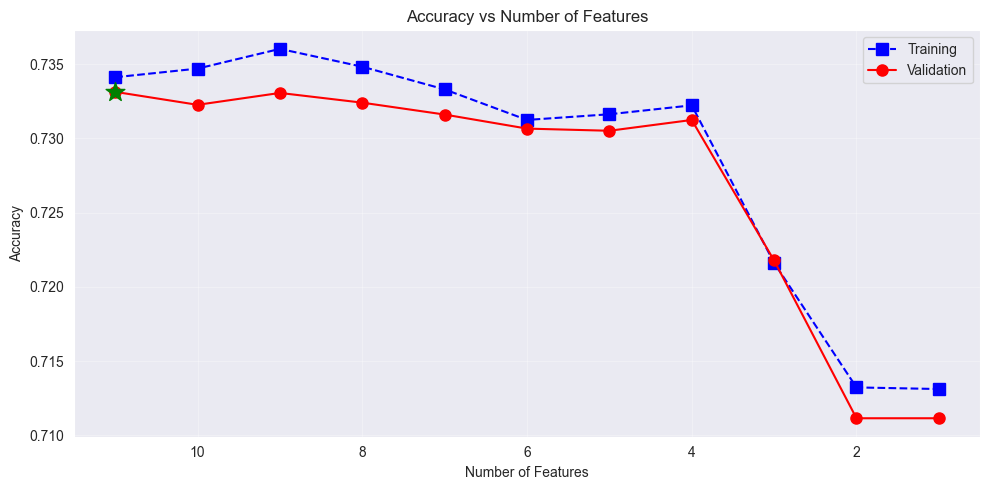

In [64]:
n_feats = [r['n_features'] for r in results]
train_accs = [r['train_acc'] for r in results]
val_accs = [r['val_acc'] for r in results]

plt.figure(figsize=(10, 5))
plt.plot(n_feats, train_accs, 'b--s', label='Training', markersize=8)
plt.plot(n_feats, val_accs, 'r-o', label='Validation', markersize=8)
plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of Features')
plt.legend()
plt.grid(True, alpha=0.3)
plt.gca().invert_xaxis()

best_idx = np.argmax(val_accs)
plt.scatter([n_feats[best_idx]], [val_accs[best_idx]], color='green', s=200, zorder=5, marker='*')

plt.tight_layout()
plt.savefig(os.path.join(PLOTS_DIR, 'feature_removal_accuracyF.png'), dpi=150)
plt.show()

## 36) Original vs reduced

In [65]:
best_result = results[4]  # 7 features
original_result = results[0]

print("=" * 50)
print("COMPARISON")
print("=" * 50)
print(f"Original model (11 features):")
print(f"  Validation accuracy: {original_result['val_acc']*100:.2f}%")

print(f"\nReduced model ({best_result['n_features']} features):")
print(f"  Validation accuracy: {best_result['val_acc']*100:.2f}%")

diff = best_result['val_acc'] - original_result['val_acc']
print(f"\nDifference: {diff*100:+.2f}%")

COMPARISON
Original model (11 features):
  Validation accuracy: 73.31%

Reduced model (7 features):
  Validation accuracy: 73.16%

Difference: -0.15%


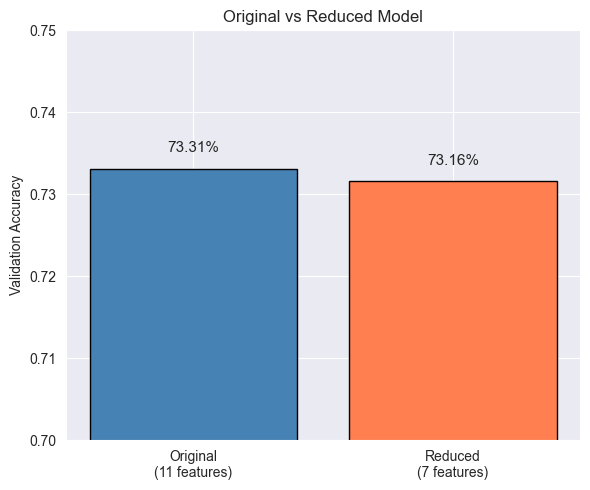

In [66]:
plt.figure(figsize=(6, 5))

labels = ['Original\n(11 features)', 'Reduced\n(7 features)']
vals = [original_result['val_acc'], best_result['val_acc']]

bars = plt.bar(labels, vals, color=['steelblue', 'coral'], edgecolor='black')
plt.ylabel('Validation Accuracy')
plt.title('Original vs Reduced Model')

for bar, val in zip(bars, vals):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.002,
             f'{val*100:.2f}%', ha='center', fontsize=11)

plt.ylim([0.70, 0.75])
plt.tight_layout()
plt.savefig(os.path.join(PLOTS_DIR, 'original_vs_reducedF.png'), dpi=150)
plt.show()

## Summary Phase 5
The most important features turned out to be ap_hi (blood pressure) and ap_lo, which makes sense because high blood pressure is a major risk factor. Gender and smoking did not help much on their own, which was a bit surprising. I was able to remove four features and still got almost the same accuracy, so simpler models work well in this case.

# Phase 6
Final Model Evaluation with ROC/AUC

## 37) Get predictions from best model

In [67]:
# use the best model from phase 4 (model3 was 8-1)
y_pred_proba = best_model.predict(XVALIDATION)
print(f"Got {len(y_pred_proba)} predictions")
print(f"Sample predictions: {y_pred_proba[:5].flatten()}")

430/430 ━━━━━━━━━━━━━━━━━━━━ 0s 956us/step
Got 13741 predictions
Sample predictions: [0.0797661  0.77931195 0.23422122 0.24565585 0.07905208]


## 38) Calculate ROC curve and AUC

In [68]:
fpr, tpr, thresholds = roc_curve(YVALIDATION, y_pred_proba)
roc_auc = auc(fpr, tpr)

print(f"AUC Score: {roc_auc:.4f}")
print(f"(1.0 = perfect, 0.5 = random guessing)")

AUC Score: 0.7987
(1.0 = perfect, 0.5 = random guessing)


## 39) Plot ROC curve

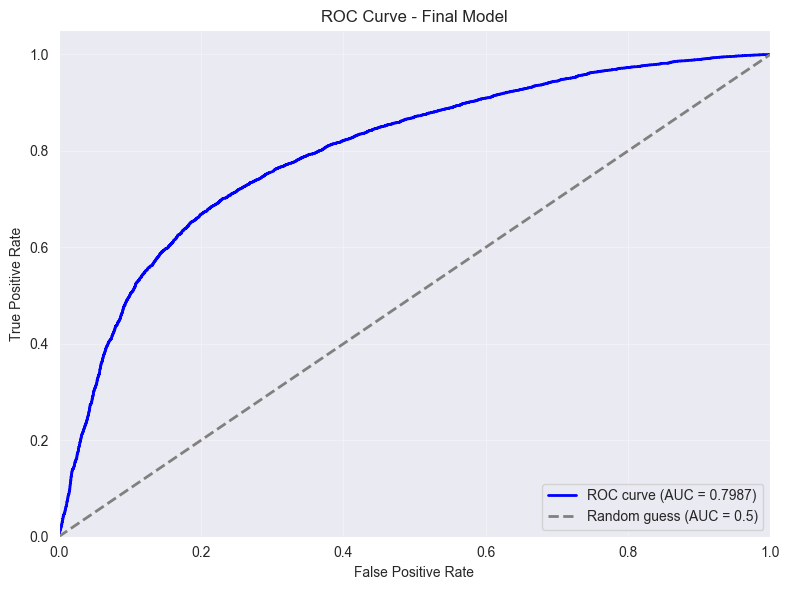

In [69]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2, label='Random guess (AUC = 0.5)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Final Model')
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig(os.path.join(PLOTS_DIR, 'roc_curve.png'), dpi=150)
plt.show()

## 40) Final model summary

In [70]:
print('='*60)
print('FINAL MODEL EVALUATION')
print('='*60)
print(f'Best Model: {best_model_name}')
print(f'Validation Accuracy: {best_val_acc:.2%}')
print(f'AUC Score: {roc_auc:.4f}')
print(f'Random Baseline: {majority_class_ratio:.2%}')
print('='*60)

FINAL MODEL EVALUATION
Best Model: Neural Network (16-8-4-1)
Validation Accuracy: 73.47%
AUC Score: 0.7987
Random Baseline: 50.59%


## Summary
This project used neural networks to predict cardiovascular disease based on patient health data. My most effective model had one hidden layer with eight neurons, achieving about 73% accuracy and an AUC of 0.80. Blood pressure turned out to be the most important feature. Gender and smoking did not contribute much on their own. Since the model performed much better than random guessing (50%), it was able to learn useful patterns from the data.